# Desafio - Classificação de notícias (BBC News)
* Alisson Santiago Amaral

A partir de notícias publicadas no website BBC News ( http://news.bbc.co.uk/), no período de 2004 a 2005, desenvolver um modelo de aprendizado de máquina baseado em classificação de texto que permita identificar o tema ao qual a notícia pertence: Esporte, Política, Negócio, Entretenimento ou Tecnologia.


Observações:
* O dataset bbc_news.csv segue anexo;
* Cada notícia possui somente um tema (os temas são mutuamente exclusivos);

## Importes bibliotecas iniciais

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 320)
import re

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from spacy import displacy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aliss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aliss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pre-tratamento de dados

### Ler arquivo csv e substituir '/n'

In [2]:
dados = pd.read_csv('./bbc_news.csv', encoding='utf-8', delimiter=';')

In [3]:
remover_breaklines = lambda x : x.replace('\n\n', ' ')
dados['Content'] = dados['Content'].apply(remover_breaklines)

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
dados.head(3)

,File_Name,Content,Category,Complete_Filename
0,001.txt,"Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier. The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. T...",business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise. And Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which ma...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim The owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (Â£479m) loan. State-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos' owner Men...,business,003.txt-business


### Removendo pontuação

Para remover pontuação resolvi usar a lista de pontuações do Spacy(costumizada).

In [6]:
punctuation = '!"#&\'()*+,-./:;<=>?@[\\]^_`{|}~'

def remover_pontuacao(texto):
    return ''.join([caractere.lower() for caractere in texto if caractere not in punctuation])

In [7]:
dados['Content'] = dados['Content'].apply(remover_pontuacao)

In [8]:
dados.head(2)

,File_Name,Content,Category,Complete_Filename
0,001.txt,ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $113bn â£600m for the three months to december from $639m yearearlier the firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner ...,business,001.txt-business
1,002.txt,dollar gains on greenspan speech the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise and alan greenspan highlighted the us governments willingness to curb spending and rising household savings as factors which may ...,business,002.txt-business


### Tokenização com nltk regex

Na tokenização foi optado por usar o nltk regex pela possibilidade de costumização. Podendo incluir expressões que englobe: $45bn, $45 ...

In [9]:
pattern = r'\w+| \w+-\w+| \$?\d+(?:\.?\d?\w+)?%?| \$\d+\.\d+|[^\w\s]+'

tokenizer_regex = RegexpTokenizer(pattern)
dados['doc'] = dados['Content'].apply(tokenizer_regex.tokenize)

In [10]:
dados.head(1)

,File_Name,Content,Category,Complete_Filename,doc
0,001.txt,ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $113bn â£600m for the three months to december from $639m yearearlier the firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner ...,business,001.txt-business,"[ad, sales, boost, time, warner, profit, quarterly, profits, at, us, media, giant, timewarner, jumped, 76%, to, $113bn, â, £, 600m, for, the, three, months, to, december, from, $639m, yearearlier, the, firm, which, is, now, one, of, the, biggest, investors, in, google, benefited, from, sales, of, highspeed, inte..."


In [11]:
doc = dados.loc[1,'doc']

### Removendo Stops Words

In [12]:
def remover_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stopwords]

In [13]:
dados['tokens'] = dados['doc'].apply(remover_stopwords)
dados.loc[:3,['tokens','Content']]

,tokens,Content
0,"[ad, sales, boost, time, warner, profit, quarterly, profits, us, media, giant, timewarner, jumped, 76%, $113bn, â, £, 600m, three, months, december, $639m, yearearlier, firm, one, biggest, investors, google, benefited, sales, highspeed, internet, connections, higher, advert, sales, timewarner, said, fourth, quar...",ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $113bn â£600m for the three months to december from $639m yearearlier the firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner ...
1,"[dollar, gains, greenspan, speech, dollar, hit, highest, level, euro, almost, three, months, federal, reserve, head, said, us, trade, deficit, set, stabilise, alan, greenspan, highlighted, us, governments, willingness, curb, spending, rising, household, savings, factors, may, help, reduce, late, trading, new, york,...",dollar gains on greenspan speech the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise and alan greenspan highlighted the us governments willingness to curb spending and rising household savings as factors which may ...
2,"[yukos, unit, buyer, faces, loan, claim, owners, embattled, russian, oil, giant, yukos, ask, buyer, former, production, unit, pay, back, $900m, â, £, 479m, loan, stateowned, rosneft, bought, yugansk, unit, $93bn, sale, forced, russia, part, settle, $275bn, tax, claim, yukos, yukos, owner, menatep, group, says, a...",yukos unit buyer faces loan claim the owners of embattled russian oil giant yukos are to ask the buyer of its former production unit to pay back a $900m â£479m loan stateowned rosneft bought the yugansk unit for $93bn in a sale forced by russia to part settle a $275bn tax claim against yukos yukos owner menatep gro...
3,"[high, fuel, prices, hit, bas, profits, british, airways, blamed, high, fuel, prices, 40%, drop, profits, reporting, results, three, months, 31, december, 2004, airline, made, pretax, profit, â, £, 75m, $141m, compared, â, £, 125m, year, earlier, rod, eddington, bas, chief, executive, said, results, respectable...",high fuel prices hit bas profits british airways has blamed high fuel prices for a 40% drop in profits reporting its results for the three months to 31 december 2004 the airline made a pretax profit of â£75m $141m compared with â£125m a year earlier rod eddington bas chief executive said the results were respectabl...


### Lematização

In [14]:
# Lemmatization
lem = nltk.stem.wordnet.WordNetLemmatizer()
dados['tokens'] = dados['tokens'].apply(lambda x: [lem.lemmatize(item) for item in x])

In [15]:
dados.head(1)

,File_Name,Content,Category,Complete_Filename,doc,tokens
0,001.txt,ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $113bn â£600m for the three months to december from $639m yearearlier the firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner ...,business,001.txt-business,"[ad, sales, boost, time, warner, profit, quarterly, profits, at, us, media, giant, timewarner, jumped, 76%, to, $113bn, â, £, 600m, for, the, three, months, to, december, from, $639m, yearearlier, the, firm, which, is, now, one, of, the, biggest, investors, in, google, benefited, from, sales, of, highspeed, inte...","[ad, sale, boost, time, warner, profit, quarterly, profit, u, medium, giant, timewarner, jumped, 76%, $113bn, â, £, 600m, three, month, december, $639m, yearearlier, firm, one, biggest, investor, google, benefited, sale, highspeed, internet, connection, higher, advert, sale, timewarner, said, fourth, quarter, sa..."


### Montando texto tokenizado

In [16]:
def montar_texto(tokens):
    return ' '.join(tokens)

In [17]:
dados['Content'] = dados['tokens'].apply(montar_texto)
dados.sample(2)

,File_Name,Content,Category,Complete_Filename,doc,tokens
262,263.txt,splitcaps pay â £ 194m compensation investor lost money following splitcapital investment trust scandal receive â £ 194m compensation uk financial watchdog announced eighteen investment firm involved sale investment agreed compensation package financial service authority fsa split marketed lowrisk way benefit risin...,business,263.txt-business,"[splitcaps, pay, â, £, 194m, compensation, investors, who, lost, money, following, the, splitcapital, investment, trust, scandal, are, to, receive, â, £, 194m, compensation, the, uks, financial, watchdog, has, announced, eighteen, investment, firms, involved, in, the, sale, of, the, investments, agreed, the, compen...","[splitcaps, pay, â, £, 194m, compensation, investor, lost, money, following, splitcapital, investment, trust, scandal, receive, â, £, 194m, compensation, uk, financial, watchdog, announced, eighteen, investment, firm, involved, sale, investment, agreed, compensation, package, financial, service, authority, fsa, spl..."
219,220.txt,standard life concern lse bid standard life latest shareholder deutsche boerse express concern german stock market operator plan buy london stock exchange said deutsche boerse show planned â £ 135bn $25bn offer lse good shareholder value report say standard life owns 1% stake deutsche boerse may seek shareholder ...,business,220.txt-business,"[standard, life, concern, at, lse, bid, standard, life, is, the, latest, shareholder, in, deutsche, boerse, to, express, concern, at, the, german, stock, market, operators, plans, to, buy, the, london, stock, exchange, it, said, deutsche, boerse, had, to, show, why, its, planned, â, £, 135bn, $25bn, offer, for, th...","[standard, life, concern, lse, bid, standard, life, latest, shareholder, deutsche, boerse, express, concern, german, stock, market, operator, plan, buy, london, stock, exchange, said, deutsche, boerse, show, planned, â, £, 135bn, $25bn, offer, lse, good, shareholder, value, report, say, standard, life, owns, 1%, ..."


## Extração de Características

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Vetorizando - Treino e Teste

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state = 0)

X = dados['Content']
y = dados['Category']

for tr, ts in kf.split(X):
    Xtr, Ytr = X.iloc[tr], y.iloc[tr]
    Xte, Yte = X.iloc[ts], y.iloc[ts]

In [20]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2))
vectorizer.fit(dados['Content'].to_list())

#treino, teste = train_test_split(dados[['Content','Category']], test_size=0.20, random_state=0)

Xtr = vectorizer.transform(Xtr.to_list())
Ytr = Ytr.to_list()

Xte = vectorizer.transform(Xte.to_list())
Yte = Yte.to_list()

## Classificação com Modelos

In [63]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [60]:
# Função para registrar as métricas
def registrar_metricas(metricas, Yte, Ypred, nome_estimador):
    metricas[nome_estimador] = {
        'acuracia': round(accuracy_score(Yte, Ypred),4),
        'precisao': round(precision_score(Yte, Ypred, pos_label=1, average='macro'),4),
        'revocacao': round(recall_score(Yte, Ypred, pos_label=1, average='macro'), 4),
        'f1': round(f1_score(Yte, Ypred, pos_label=1, average='macro'),4)
    }

metricas = dict()

### Classificação com LinearSVC

In [64]:
svc_model = LinearSVC(C=0.3)
svc_model.fit(Xtr, Ytr)
Ypred_svc = svc_model.predict(Xte)
labels_svc = svc_model.classes_
registrar_metricas(metricas, Yte, Ypred_svc, 'LinearSVC')
matriz_confusao_svc = confusion_matrix(Yte, Ypred_svc, labels=labels_svc)

### Classificação com MultinomialNB

In [25]:
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
Ypred_nb = nb.predict(Xte)
labels_nb = nb.classes_
registrar_metricas(metricas, Yte, Ypred_nb, 'MultinomialNB')
matriz_confusao_nb = confusion_matrix(Yte, Ypred_nb, labels=labels_nb)

### Classificação com LBGMClassifier

In [26]:
lgbm = LGBMClassifier()
lgbm.fit(Xtr, Ytr)
Ypred_lgbm = lgbm.predict(Xte)
labels_lgbm = lgbm.classes_
registrar_metricas(metricas, Yte, Ypred_lgbm, 'LGBM')
matriz_confusao_lgbm = confusion_matrix(Yte, Ypred_lgbm, labels=labels_lgbm)

### Classificação com o SVM

In [27]:
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(Xtr, Ytr)
Ypred_svm = svm_model.predict(Xte)
labels_svm = svm_model.classes_
registrar_metricas(metricas, Yte, Ypred_svm, 'SVM')
matriz_confusao_svm = confusion_matrix(Yte, Ypred_svm, labels=labels_svm)

### Resultados preliminares

In [28]:
resultados = pd.DataFrame(metricas).T
resultados

,acuracia,precisao,revocacao,f1
LinearSVC,0.9784,0.9786,0.9770,0.9776
MultinomialNB,0.9568,0.9601,0.9526,0.9550
LGBM,0.9771,0.9781,0.9763,0.9771
SVM,0.9811,0.9810,0.9801,0.9804


In [29]:
from matplotlib import pyplot as plt

def plotar_matriz_confusao(matriz, titulo, labels):
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_title(titulo)
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=labels)
    disp.plot(cmap='Blues', ax=ax)

Matriz de Confusão - SVM

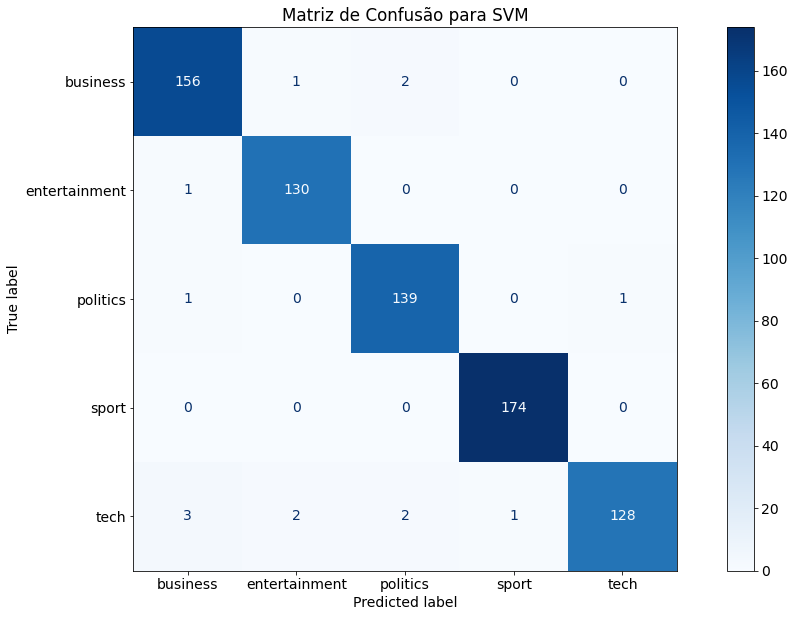

In [30]:
plotar_matriz_confusao(matriz_confusao_svm, 'Matriz de Confusão para SVM', labels_svm)

O modelo escolhido foi o SVM e iremos agora tentar "tunar" os seus paramentros para uma possível melhora de acurácia.

## Tuning Parameter

In [45]:
from skopt import dummy_minimize
from sklearn import svm

from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical

Para identificar os melhores parâmetros do modelo iremos utilizar a técnica de Bayesian Optimization.

### Bayesian Optimization

In [46]:
from skopt import gp_minimize

#### SVM

In [47]:
def treinar_model_SVM(params):
    C = params[0]
    kernel = params[1]
    gamma = params[2]

    print(params, '\n')

    svm_model = svm.SVC(C = C, kernel=kernel, gamma=gamma, random_state=27)
    svm_model.fit(Xtr, Ytr)

    p = svm_model.predict(Xte)

    return -round(accuracy_score(Yte, p),4)

space = [Real(0.1,100.0, 'log-uniform'),
        Categorical(['linear','rbf', 'poly', 'sigmoid']),
        Real(0.001,10, 'log-uniform')]

In [48]:
resultados_gp = gp_minimize(treinar_model_SVM, space, random_state=1, verbose =1, n_calls=45, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[98.0741228990047, 'sigmoid', 0.0032546012860767215] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.7995
Function value obtained: -0.9757
Current minimum: -0.9757
Iteration No: 2 started. Evaluating function at random point.
[99.33940306516521, 'poly', 0.03857650773770048] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.8798
Function value obtained: -0.2146
Current minimum: -0.9757
Iteration No: 3 started. Evaluating function at random point.
[1.4579150644317593, 'rbf', 5.522761430909137] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 7.5945
Function value obtained: -0.3252
Current minimum: -0.9757
Iteration No: 4 started. Evaluating function at random point.
[34.58858137056757, 'poly', 0.12536971491294213] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 8.0924
Function value obtained: -0.2146
Current minimum: -0.9757
Iteration No: 

In [50]:
resultados_gp.x

[3.1543627291288514, 'sigmoid', 1.6654697554095277]

## Resultados

Segundo os resultados do Bayesian Optimization o modelo SVM utilizando os parâmetros: C:3.1, Kernel: "sigmoid", gamma: 1.6 , teve o melhor resultado. Sendo assim será o modelo escolhido.

In [51]:
metricasSVM = dict()

In [76]:
svm_model = svm.SVC(C = 3.16, kernel='sigmoid', gamma=1.7, random_state=27)
svm_model.fit(Xtr, Ytr)
Ypred_svm = svm_model.predict(Xte)
labels_svm = svm_model.classes_
registrar_metricas(metricasSVM, Yte, Ypred_svm, 'SVM_Sigmoid')
matriz_confusao_svm = confusion_matrix(Yte, Ypred_svm, labels=labels_svm)

In [77]:
resultadosSVM = pd.DataFrame(metricasSVM).T
resultadosSVM

,acuracia,f1,precisao,revocacao
SVM_Sigmoid,0.9825,0.9818,0.9824,0.9816


A matriz de confusão nos mostra um ótimo padrão, sendo observado apenas pequenos erros entre as categorias politics e business e tech, não sendo significante.

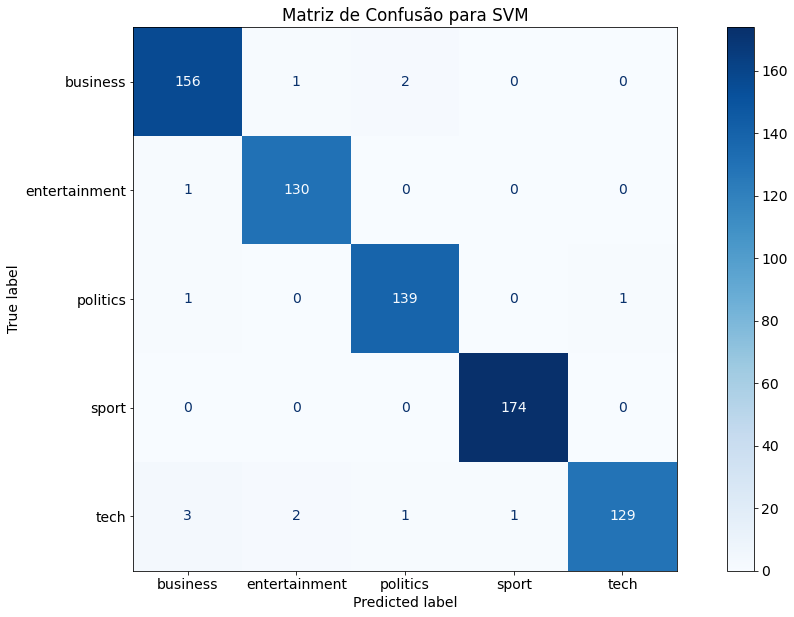

In [78]:
plotar_matriz_confusao(matriz_confusao_svm, 'Matriz de Confusão para SVM', labels_nb)

* Conseguimos chegar a um bom modelo, com boa acurácia e precisão.

* Analisando a matriz de confusão é possível identificar que o modelo ainda está confundido notícias classificadas em tech e business. Esse comportamento já é esperado, visto que são assuntos muitos similares e com linguaguem parecida.
